In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_csv('ames_transactions.csv')

In [3]:
df

property_id                    dwelling_subclass  \
0     0526301100  One_Story_1946_and_Newer_All_Styles   
1     0526350040  One_Story_1946_and_Newer_All_Styles   
2     0526351010  One_Story_1946_and_Newer_All_Styles   
3     0526353030  One_Story_1946_and_Newer_All_Styles   
4     0527105010             Two_Story_1946_and_Newer   
...          ...                                  ...   
2925  0923275080                  Split_or_Multilevel   
2926  0923276100  One_Story_1946_and_Newer_All_Styles   
2927  0923400125                          Split_Foyer   
2928  0924100070  One_Story_1946_and_Newer_All_Styles   
2929  0924151050             Two_Story_1946_and_Newer   

                   zoning_type  lot_frontage_ft  lot_area_sq_ft street_type  \
0      Residential_Low_Density              141           31770        Pave   
1     Residential_High_Density               80           11622        Pave   
2      Residential_Low_Density               81           14267        Pave   
3      Residential_Low_Density               93           11160        Pave   
4      Residential_Low_Density               74           13830        Pave   
...                        ...              ...             ...         ...   
2925   Residential_Low_Density               37            7937        Pave   
2926   Residential_Low_Density                0            8885        Pave   
2927   Residential_Low_Density               62           10441        Pave   
2928   Residential_Low_Density               77           10010        Pave   
2929   Residential_Low_Density               74            9627        Pave   

           alley_type           lot_shape land_contour utilities  ...  \
0     No_Alley_Access  Slightly_Irregular          Lvl    AllPub  ...   
1     No_Alley_Access             Regular          Lvl    AllPub  ...   
2     No_Alley_Access  Slightly_Irregular          Lvl    AllPub  ...   
3     No_Alley_Access             Regular          Lvl    AllPub  ...   
4     No_Alley_Access  Slightly_Irregular          Lvl    AllPub  ...   
...               ...                 ...          ...       ...  ...   
2925  No_Alley_Access  Slightly_Irregular          Lvl    AllPub  ...   
2926  No_Alley_Access  Slightly_Irregular          Low    AllPub  ...   
2927  No_Alley_Access             Regular          Lvl    AllPub  ...   
2928  No_Alley_Access             Regular          Lvl    AllPub  ...   
2929  No_Alley_Access             Regular          Lvl    AllPub  ...   

     fence_quality_rating misc_feature misc_value month_sold year_sold  \
0                No_Fence          NaN          0          5      2010   
1         Minimum_Privacy          NaN          0          6      2010   
2                No_Fence         Gar2      12500          6      2010   
3                No_Fence          NaN          0          4      2010   
4         Minimum_Privacy          NaN          0          3      2010   
...                   ...          ...        ...        ...       ...   
2925         Good_Privacy          NaN          0          3      2006   
2926      Minimum_Privacy          NaN          0          6      2006   
2927      Minimum_Privacy         Shed        700          7      2006   
2928             No_Fence          NaN          0          4      2006   
2929             No_Fence          NaN          0         11      2006   

     sale_type sale_condition sale_price  longitude   latitude  
0          WD          Normal     215000 -93.619754  42.054035  
1          WD          Normal     105000 -93.619756  42.053014  
2          WD          Normal     172000 -93.619387  42.052659  
3          WD          Normal     244000 -93.617320  42.051245  
4          WD          Normal     189900 -93.638933  42.060899  
...        ...            ...        ...        ...        ...  
2925       WD          Normal     142500 -93.604776  41.988964  
2926       WD          Normal     131000 -93.602680  41.988314  
2927       WD       

In [4]:
df.drop(columns='property_id', inplace=True)

In [5]:
numFeat = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numFeat)} numerical features:\n", numFeat)

There are 35 numerical features:
 ['lot_frontage_ft', 'lot_area_sq_ft', 'year_built', 'year_remod_add', 'masonry_veneer_area_sq_ft', 'bsmt_fin_type_1_sq_ft', 'bsmt_fin_type_2_sq_ft', 'bsmt_unf_sq_ft', 'total_bsmt_sq_ft', 'first_flr_sq_ft', 'second_flr_sq_ft', 'low_quality_fin_sq_ft', 'gr_living_area_sq_ft', 'bsmt_full_bath_count', 'bsmt_half_bath_count', 'full_bath_count', 'half_bath_count', 'bedroom_abv_grd_count', 'kitchen_abv_grd_count', 'room_abv_grd_count', 'fireplace_count', 'garage_car_count', 'garage_area_sq_ft', 'wood_deck_sq_ft', 'open_porch_sq_ft', 'enclosed_porch_sq_ft', 'three_season_porch_sq_ft', 'screen_porch_sq_ft', 'pool_area_sq_ft', 'misc_value', 'month_sold', 'year_sold', 'sale_price', 'longitude', 'latitude']


In [6]:
catFeat = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catFeat)} categorical features:\n", catFeat)

There are 46 categorical features:
 ['dwelling_subclass', 'zoning_type', 'street_type', 'alley_type', 'lot_shape', 'land_contour', 'utilities', 'lot_configuration', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'dwelling_type', 'dwelling_style', 'overall_quality_rating', 'overall_condition_rating', 'roof_style', 'roof_material', 'exterior_type_1', 'exterior_type_2', 'masonry_veneer_type', 'exterior_quality_rating', 'exterior_condition_rating', 'foundation_type', 'bsmt_quality_rating', 'bsmt_condition_rating', 'bsmt_exposure_rating', 'bsmt_fin_type_1_rating', 'bsmt_fin_type_2_rating', 'heating_type', 'heating_quality_rating', 'has_central_air', 'electrical_system_type', 'kitchen_quality_rating', 'functionality_type', 'fireplace_quality_rating', 'garage_type', 'garage_finish_rating', 'garage_quality_rating', 'garage_condition_rating', 'paved_drive_type', 'pool_quality_rating', 'fence_quality_rating', 'misc_feature', 'sale_type', 'sale_condition']


In [7]:
def visualizeCatFeature(feature, axes, index):
    """
    Visualize the relationship between `SalePrice` and categorical feature using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = df.groupby(
        [feature]).median().sale_price.sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='sale_price',
                data=df,
                order=featOrder,
                palette='GnBu_r',
                ax=axes[index, 0])
    
    axes[index, 0].set_title(f'{feature} vs Sales Price')
    axes[index, 0].set_xlabel(f'{feature}')
    axes[index, 0].set_ylabel('Sales Price')
    axes[index, 0].tick_params(axis='x', rotation=45)
    
    # Create hist plot
    sns.histplot(x=feature,
                data=df,
                ax=axes[index, 1])
    
    axes[index, 1].set_title(f'{feature}')
    axes[index, 1].set_xlabel(f'{feature}')
    # axes[index, 1].set_ylabel('Sales Price')
    axes[index, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()

## EDA Categorical Features

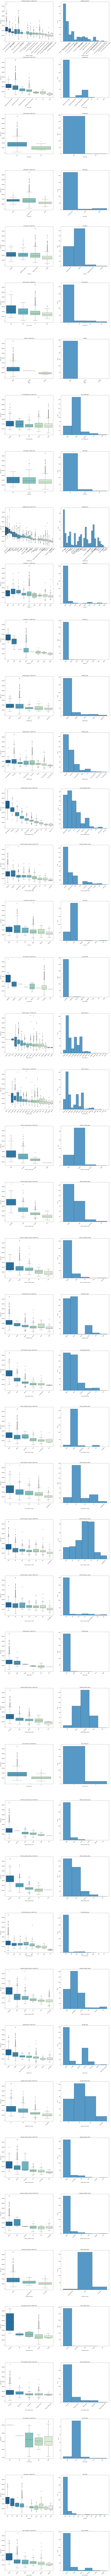

In [8]:
fig, axs = plt.subplots(46, 2, figsize=(20, 46*10))

for idx, feature in enumerate(catFeat):
    visualizeCatFeature(feature, axs, idx)

- Neighborhood : Clear difference in Sale Price among neighborhood. Number of properties sold is not uniform acorss different neighborhoods this might add bias to the model.
- Overall Qaulity Rating: There is a clear upward shift in the distribution of SalePrice as quality increases.
- Zoning Type: Difference in median price across different zones but `Residential Low Density` zone is large number.
- Roof material, condition_2, masnory_veneer_type, sale_type: Difference in median price across different zones but non-uniform distribution
- Exterion quality rating, bsmt_quality_rating, heating_quality_rating, kitchen_qaulity_rating, garage_finish_rating: All show quite significant change in Sale Price but these could be highly correlated to overall quality rating

## EDA Numerical Features

### Sale price

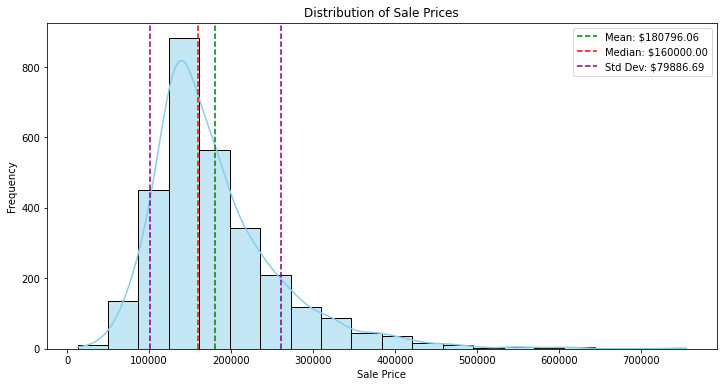

In [9]:
plt.figure(figsize=(12,6))

# Plot the distribution of sale prices
sns.histplot(x=df['sale_price'], bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')

# Add summary statistics (mean, median, and standard deviation)
mean_price = df['sale_price'].mean()
median_price = df['sale_price'].median()
std_price = df['sale_price'].std()
plt.axvline(mean_price, color='green', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: ${median_price:.2f}')
plt.axvline(mean_price + std_price, color='purple', linestyle='--', label=f'Std Dev: ${std_price:.2f}')
plt.axvline(mean_price - std_price, color='purple', linestyle='--')

# Add a legend
plt.legend()

# Show the plot
plt.show()

- The distribution of `Sale Price` is right-skewed. Need to transform it if using a linear regression model

### Other features

In [10]:
def visualizeNumFeature(feature, axes, index):
    """
    Visualize the relationship between `SalePrice` and numerical feature using reg plots
    """

    # Create box plot
    sns.regplot(x=feature,
                y='sale_price',
                data=df,
                color = 'red',
                scatter_kws = {'color': sns.xkcd_rgb['bluish']},
                line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'},
                ax=axes[index, 0])
    
    axes[index, 0].set_title(f'{feature} vs Sales Price')
    axes[index, 0].set_xlabel(f'{feature}')
    axes[index, 0].set_ylabel('Sales Price')
    axes[index, 0].tick_params(axis='x', rotation=45)
    
    # Create hist plot
    sns.histplot(x=feature,
                 data=df,
                 bins=20,
                 kde=True, 
                 color='skyblue',
                 ax=axes[index, 1])
    
    axes[index, 1].set_title(f'{feature}')
    axes[index, 1].set_xlabel(f'{feature}')
    axes[index, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()

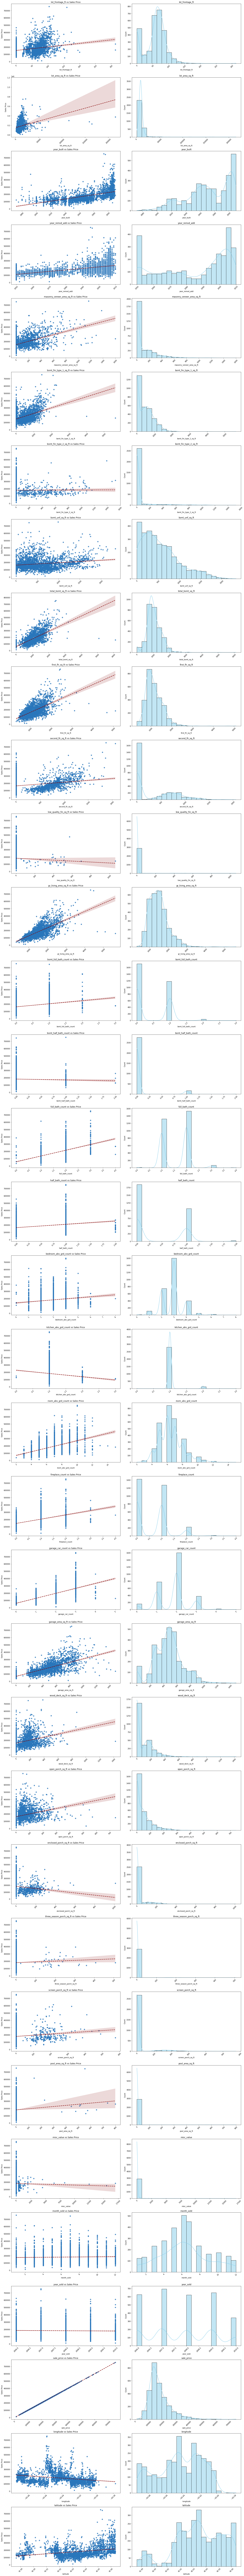

In [11]:
fig, axs = plt.subplots(35, 2, figsize=(20, 35*6))

for idx, feature in enumerate(numFeat):
    visualizeNumFeature(feature, axs, idx)

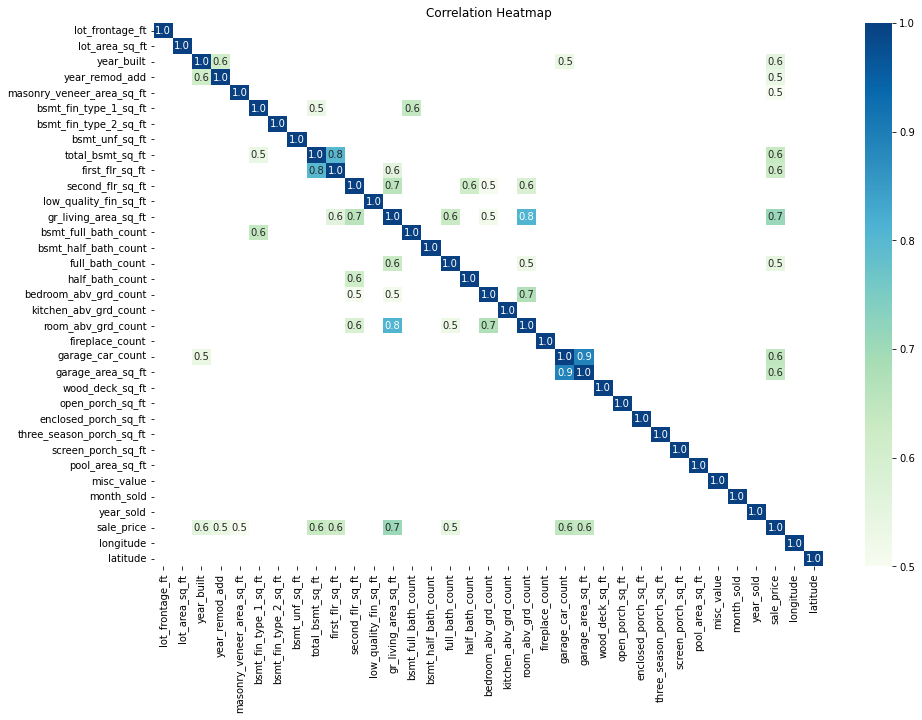

In [12]:
# Create correlation matrix from data
corr_mat = df[numFeat].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

- lot_area, lot_frontage, total_bsmt_sqft, first_flr_sqft, gr_living_area_sqft : Shows linear relationship with house price but presence of outlier
- year_built: Looks important feature, newer the houses have higher prices. Interesting to see some very old houses having high prices. Maybe historically important?
- Number of bathrooms, kitchen, living room: As number increases price increases.
- Month-Year sold: Shows no change in sale price
- Correlation plot shows area and count features having high correlation with Sale Price
- Also there is multicollinearity between some features, we can do some feature engineering to remove it.